# Analyzing Ford GoBikes System Data¶
## By Tash Bettridge 

## Preliminary Wrangling

>Formerly known as Ford GoBike, renamed Lyft Bikes is a regional public bicycle sharing system in the San Francisco Bay Area, California.

### Data

The data will be analysed from the following:

* 2019 FordGo Bike and Baywheels Tripdata

### Process

The data wrangling steps that were involved in this project were:
- Step 1. Assessing the Data 
- Step 2. Preliminary Wrangling
- Step 3. Cleaning data
- Step 4. Univariate Exploration
- Step 5. Multivariate Exploration



### Step 1. Assessing the Data 

Data Analysis, storing data and data visualization of the wrangled data


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os
import datetime
import matplotlib.ticker as tick
%matplotlib inline

In [2]:
#Retrieve the datasets from the User directory 
path = r'C:\Users\tash_\Desktop\Udacity\dataset'
# detect all of the files ending with a .csv name within a specific working directory
files = glob.glob(os.path.join(path, "*.csv"))

In [3]:
#use the pd.concat() method to stack every dataframe one on top of another.
df = pd.concat((pd.read_csv(f) for f in files), ignore_index = False)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [4]:
#Save a Copy To Master File
df.to_csv('baywheels_master.csv', index = False)



### Step 2. Preliminary Wrangling

In [5]:
# Read contents of Master File
df = pd.read_csv('baywheels_master.csv')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# Showing the first five rows of the newly combined dataset
df.describe()


,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude
count,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06
mean,2.789833e+04,8.076483e+02,1.427044e+02,3.776422e+01,-1.223459e+02,1.465047e+02,3.776506e+01,-1.223499e+02
std,1.146067e+05,1.974714e+03,1.214296e+02,2.392885e-01,7.080417e-01,1.223171e+02,1.363698e-01,3.089648e-01
min,4.000000e+00,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02
25%,1.952000e+03,3.590000e+02,4.300000e+01,3.777003e+01,-1.224117e+02,4.700000e+01,3.776931e+01,-1.224130e+02
50%,4.420000e+03,5.710000e+02,1.010000e+02,3.778076e+01,-1.223981e+02,1.050000e+02,3.778053e+01,-1.223983e+02
75%,9.682000e+03,8.870000e+02,2.390000e+02,3.779587e+01,-1.222934e+02,2.430000e+02,3.779539e+01,-1.222914e+02
max,9.999410e+05,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00


In [7]:
#Retrieve the first 10 samples of the data
df.sample(10)


,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
1154512,896,No,451,115.0,37.765026,-122.398773,Jackson Playground,2019-06-14 09:36:16.6730,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2019-06-14 09:28:45.5450,Subscriber
2176750,2216,No,681,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2019-11-27 15:14:28.6780,NaN,10.0,37.795393,-122.404770,Washington St at Kearny St,2019-11-27 15:03:06.7740,Subscriber
503299,3405,No,424,121.0,37.759210,-122.421339,Mission Playground,2019-03-17 12:56:59.3760,NaN,141.0,37.747998,-122.420219,Valencia St at Cesar Chavez St,2019-03-17 12:49:54.4390,Customer
885510,1228,No,622,122.0,37.760299,-122.418892,19th St at Mission St,2019-05-29 20:26:14.3490,NaN,88.0,37.770030,-122.411726,11th St at Bryant St,2019-05-29 20:15:52.2210,Subscriber
941319,988,No,334,372.0,37.804037,-122.262409,Madison St at 17th St,2019-05-20 11:31:34.7140,NaN,181.0,37.811377,-122.265192,Grand Ave at Webster St,2019-05-20 11:26:00.5460,Subscriber
567674,6188,No,1087,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2019-03-10 13:11:50.4590,NaN,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2019-03-10 12:53:42.8860,Customer
350110,2193,No,730,8.0,37.799953,-122.398525,The Embarcadero at Vallejo St,2019-02-05 20:05:53.9530,NaN,36.0,37.783830,-122.398870,Folsom St at 3rd St,2019-02-05 19:53:43.8850,Subscriber
2425905,3417,NaN,1295,146.0,37.742314,-122.423181,30th St at San Jose Ave,2019-12-11 16:53:20.6690,NaN,62.0,37.777791,-122.406432,Victoria Manalo Draves Park,2019-12-11 16:31:44.8200,Customer
443231,5306,No,719,80.0,37.775235,-122.397437,Townsend St at 5th St,2019-03-23 19:37:27.2450,NaN,121.0,37.759210,-122.421339,Mission Playground,2019-03-23 19:25:27.4630,Customer
3373,2124,No,519,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2019-01-31 17:23:47.1020,NaN,25.0,37.787522,-122.397405,Howard St at 2nd St,2019-01-31 17:15:07.8980,Subscriber


In [8]:
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
bike_id                    2506983 non-null int64
bike_share_for_all_trip    2263724 non-null object
duration_sec               2506983 non-null int64
end_station_id             2424081 non-null float64
end_station_latitude       2506983 non-null float64
end_station_longitude      2506983 non-null float64
end_station_name           2424633 non-null object
end_time                   2506983 non-null object
rental_access_method       120838 non-null object
start_station_id           2426249 non-null float64
start_station_latitude     2506983 non-null float64
start_station_longitude    2506983 non-null float64
start_station_name         2426850 non-null object
start_time                 2506983 non-null object
user_type                  2506983 non-null object
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [9]:
df.isnull().sum()


bike_id                          0
bike_share_for_all_trip     243259
duration_sec                     0
end_station_id               82902
end_station_latitude             0
end_station_longitude            0
end_station_name             82350
end_time                         0
rental_access_method       2386145
start_station_id             80734
start_station_latitude           0
start_station_longitude          0
start_station_name           80133
start_time                       0
user_type                        0
dtype: int64

In [10]:
# Check dataset for duplicated data
df.duplicated().sum()

0

### Store Data

In [11]:
# Save the original data set and create a copy 
df_cleaned = df.copy()

### Step 3. Cleaning Data 
There are some missing values in the dataset, such as start_station_id, start_station_name, end_station_id, end_station_name, rental_access_method. For more information please see below:

* start_station_id
* end_station_id
* bike_id
* user_type
* rental_access_method



### Define

>Calculate the total distance traveled using the latitude and longitude in the data set

### Code

In [12]:
import math
from math import radians, sin, cos, acos
def distance(origin, destination):
    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371 # this is in kms
    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    x = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) 
         * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    y = 2 * math.atan2(math.sqrt(x), math.sqrt(1 - x))
    z = radius * y
    return z

In [13]:
# Using the calcuated math on the columns for latidue and longitude
df_cleaned['distance_km'] = df_cleaned.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [14]:
# Converting the kilometers to miles
df_cleaned['distance_miles'] = df_cleaned['distance_km'] * 0.621371

### Test

In [15]:
df_cleaned.sample(5)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,distance_km,distance_miles
1281537,9252,No,1438,280.0,37.337122,-121.883215,San Fernando St at 7th St,2019-07-24 23:01:44.2630,NaN,310.0,37.335885,-121.885660,San Fernando St at 4th St,2019-07-24 22:37:46.2200,Customer,0.256257,0.159231
804818,6303,No,606,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2019-04-08 08:39:35.3010,NaN,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2019-04-08 08:29:28.5180,Subscriber,0.000000,0.000000
1428576,936255,NaN,1179,NaN,37.780504,-122.439246,NaN,2019-07-29 07:39:30,app,NaN,37.746438,-122.420584,NaN,2019-07-29 07:19:51,Subscriber,4.128022,2.565033
2323427,11381,No,618,363.0,37.787492,-122.398285,Salesforce Transit Center (Natoma St at 2nd St),2019-11-05 17:37:00.0100,NaN,323.0,37.798014,-122.405950,Broadway at Kearny,2019-11-05 17:26:41.5510,Subscriber,1.349995,0.838848
1074516,1896,No,443,9.0,37.798572,-122.400869,Broadway at Battery St,2019-06-27 08:23:18.2310,NaN,22.0,37.789756,-122.394643,Howard St at Beale St,2019-06-27 08:15:55.0040,Subscriber,1.122623,0.697565


### Define 

> Converting the Start_time and end_time to the timestamp format

### Code

In [16]:
# Converting the format to datetime
df_cleaned.start_time = pd.to_datetime(df_cleaned.start_time)
df_cleaned.end_time = pd.to_datetime(df_cleaned.end_time)

### Test 

In [17]:
df_cleaned.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 17 columns):
bike_id                    2506983 non-null int64
bike_share_for_all_trip    2263724 non-null object
duration_sec               2506983 non-null int64
end_station_id             2424081 non-null float64
end_station_latitude       2506983 non-null float64
end_station_longitude      2506983 non-null float64
end_station_name           2424633 non-null object
end_time                   2506983 non-null datetime64[ns]
rental_access_method       120838 non-null object
start_station_id           2426249 non-null float64
start_station_latitude     2506983 non-null float64
start_station_longitude    2506983 non-null float64
start_station_name         2426850 non-null object
start_time                 2506983 non-null datetime64[ns]
user_type                  2506983 non-null object
distance_km                2506983 non-null float64
distance_miles             2506983 non-null float64

## Define 

>Converting the User type and rental_access_method for all to category format


## Code

In [18]:
# Converting the user_type and rental_access_method to category format
df_cleaned.user_type = df_cleaned.user_type.astype('category')
df_cleaned.rental_access_method = df_cleaned.rental_access_method.astype('category')

## Test

In [19]:
df_cleaned.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 17 columns):
bike_id                    2506983 non-null int64
bike_share_for_all_trip    2263724 non-null object
duration_sec               2506983 non-null int64
end_station_id             2424081 non-null float64
end_station_latitude       2506983 non-null float64
end_station_longitude      2506983 non-null float64
end_station_name           2424633 non-null object
end_time                   2506983 non-null datetime64[ns]
rental_access_method       120838 non-null category
start_station_id           2426249 non-null float64
start_station_latitude     2506983 non-null float64
start_station_longitude    2506983 non-null float64
start_station_name         2426850 non-null object
start_time                 2506983 non-null datetime64[ns]
user_type                  2506983 non-null category
distance_km                2506983 non-null float64
distance_miles             2506983 non-null flo

## Define

> Convertng the bike_id, start_station_id, and end_station_id to object


## Code

In [20]:
# Convertng the bike_id, start_station_id, and end_station_id to object
df_cleaned.bike_id = df_cleaned.bike_id.astype(str)
df_cleaned.start_station_id = df_cleaned.start_station_id.astype(str)
df_cleaned.end_station_id = df_cleaned.end_station_id.astype(str)

## Test

In [21]:
df_cleaned.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 17 columns):
bike_id                    2506983 non-null object
bike_share_for_all_trip    2263724 non-null object
duration_sec               2506983 non-null int64
end_station_id             2506983 non-null object
end_station_latitude       2506983 non-null float64
end_station_longitude      2506983 non-null float64
end_station_name           2424633 non-null object
end_time                   2506983 non-null datetime64[ns]
rental_access_method       120838 non-null category
start_station_id           2506983 non-null object
start_station_latitude     2506983 non-null float64
start_station_longitude    2506983 non-null float64
start_station_name         2426850 non-null object
start_time                 2506983 non-null datetime64[ns]
user_type                  2506983 non-null category
distance_km                2506983 non-null float64
distance_miles             2506983 non-null floa

###  Define

>Adding columns for the start month, days of the week to create data visualisations. 

### Code

In [22]:
# Start time month from January through to December 2019
df_cleaned['start_time_month'] = df_cleaned['start_time'].dt.strftime('%B')
df_cleaned['start_time_month_number'] = df_cleaned['start_time'].dt.month.astype(int)
df_cleaned['start_time_weekday'] = df_cleaned['start_time'].dt.strftime('%a')

### Test

In [23]:
df_cleaned.sample(3)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,distance_km,distance_miles,start_time_month,start_time_month_number,start_time_weekday
2256523,12258,No,531,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2019-11-14 20:30:57.315,NaN,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-11-14 20:22:05.497,Subscriber,0.860499,0.534689,November,11,Thu
1930081,9817,No,3823,377.0,37.771951,-122.453705,Fell St at Stanyan St,2019-09-01 14:02:45.440,NaN,29.0,37.782405,-122.439446,O'Farrell St at Divisadero St,2019-09-01 12:59:02.288,Customer,1.709274,1.062093,September,9,Sun
1829101,400,No,1309,350.0,37.771431,-122.405787,8th St at Brannan St,2019-09-15 19:51:33.722,NaN,386.0,37.752105,-122.419724,24th St at Bartlett St,2019-09-15 19:29:44.691,Subscriber,2.473688,1.537078,September,9,Sun


###  Define

>Adding columns for the  of the week to create data visualisations. 

### Code

In [24]:
# Start and end time hour and # Duration in seconds to duration in minutes
df_cleaned['start_time_hour'] = df_cleaned['start_time'].dt.hour
df_cleaned['end_time_hour'] = df_cleaned['end_time'].dt.hour
df_cleaned['duration_min'] = df_cleaned['duration_sec']/60
df_cleaned['duration_min'] = df_cleaned['duration_min'].astype(int)

### Test

In [25]:
df_cleaned.sample(3)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,...,start_time,user_type,distance_km,distance_miles,start_time_month,start_time_month_number,start_time_weekday,start_time_hour,end_time_hour,duration_min
501973,6279,No,315,37.0,37.785377,-122.396906,2nd St at Folsom St,2019-03-17 15:04:31.728,NaN,16.0,...,2019-03-17 14:59:16.219,Subscriber,0.997356,0.619728,March,3,Sun,14,15,5
104829,5097,Yes,1871,99.0,37.767037,-122.415442,Folsom St at 15th St,2019-01-17 21:51:37.325,NaN,112.0,...,2019-01-17 21:20:26.283,Subscriber,0.414484,0.257548,January,1,Thu,21,21,31
1350344,785,No,406,27.0,37.788059,-122.391865,Beale St at Harrison St,2019-07-12 10:08:15.490,NaN,81.0,...,2019-07-12 10:01:28.500,Subscriber,1.359125,0.844521,July,7,Fri,10,10,6


### Store Data

In [26]:
#Store data into Master file ('baywheels_master_clean.csv)
df_cleaned.to_csv('baywheels_master_clean.csv', index = False)

### What is the structure of your dataset?

The FordGoBike and BayWheels Datasets provide a valuable collection of data to work with in order draw data findings and a conclusion. This notebook uses data collected from January 2019 which the organisation was still using the naming structure FordGoBike until May 2019 and then changed its naming structure December 2019. There have been some anomity changes in the dataset and can no longer be distinguish by genderm work or ethnicity data. 


> The dataset has 25000+ bike rides that had happened in 2019. 

### The dataset contained features about:

* trip duration
* start time/end time
* stations: start/end station, name, geolocation (latitude/longitude)
* anonymized customer data: The users are divided into two user types: Subscriber and Customer
* rented bikes: bike_id 


### The following columns that were added in the data cleaning phase:


* Start Time Month
* Start Time Month Number
* Start Time Day of the Week
* Start Time Hour
* Distance (km)
* Distance (miles)
  

### What is/are the main feature(s) of interest in your dataset?

> I am interested in investigate the main features which include data that is related to the start time and end time of a ride. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features in the dataset that I think will ehance my investigation would be looking at the start times and end times as well as any related time-based information. 

## Step 4. Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

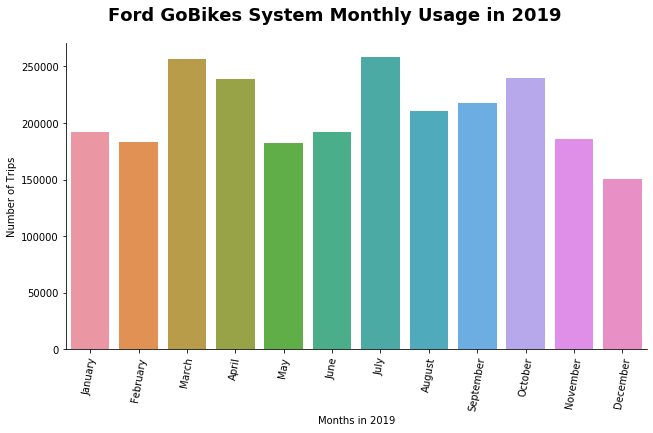

In [27]:
#Display mFord GoBikes System Monthly Usage in 2019
graph = sb.catplot(data = df_cleaned, x = 'start_time_month', 
                   kind = 'count', aspect = 1.8);
graph.set_axis_labels('Months in 2019','Number of Trips'),
graph.fig.suptitle('Ford GoBikes System Monthly Usage in 2019',
                   y = 1.07, fontsize = 18, fontweight = 'bold');
graph.set_xticklabels(rotation=80)

### Ford GoBikes System Monthly Usage in 2019

> In the Bay Area, July which is in Summer in the Northen Hemispher is the most popular time to use the Ford Go Bike sharing system. March is also the second most popular time to use the Ford Go Bike sharing system in the Bay Area. 

>While December which is Winter time in the Northern Hemisphere, is the least popular time to use the Ford Go Bike Sharing System. Therefore, there will be more bikes available due to the usuage of bikes not been used around the Christmas Holidays. 

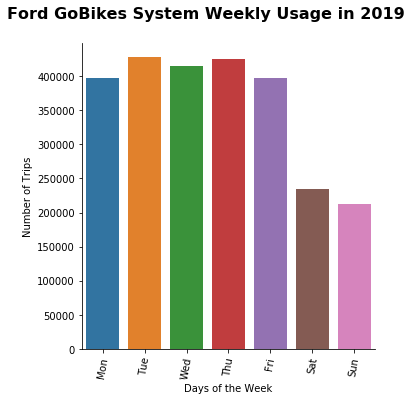

In [45]:
# Ford GoBikes System Wekkly Usage in 2019
days_of_the_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
graph = sb.catplot(data=df_cleaned, x='start_time_weekday', 
                   kind='count', order = days_of_the_week)
graph.set_axis_labels('Days of the Week', 'Number of Trips')
graph.fig.suptitle('Ford GoBikes System Weekly Usage in 2019',
                   y=1.07, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=80);

### Ford GoBikes System Weekly Usage in 2019

In 2019, Monday through Friday has heavy usage in hiring bikes from the Ford Go Bike sharing system in the Bay Area. 
The usage drops significantly on the weekend where Saturday and Sunday. The data suggests that the Ford Go Bike sharing system is mainly used during the week. 

In [29]:
#Finding the duration 
df_cleaned.duration_min.describe(percentiles = [.95])
df_cleaned.duration_min.describe()

count    2.506983e+06
mean     1.296946e+01
std      3.291311e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.520100e+04
Name: duration_min, dtype: float64

In [30]:
#Find out the average trip
df_cleaned.duration_min.mean()

12.969462497352396

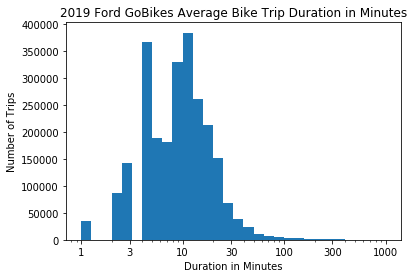

In [31]:
# Display the duration bike rides in minutes 
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(t) for t in ticks]
plt.hist(data = df_cleaned , x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration in Minutes');
plt.title('2019 Ford GoBikes Average Bike Trip Duration in Minutes');
plt.ylabel('Number of Trips');

### 2019 Duration of Bike Trips in Ford GoBikes System

> In 2019, the average duration of bike trips was under 12.96 minutes. 


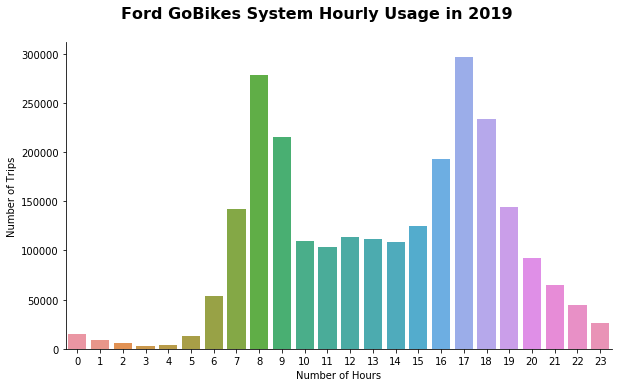

In [32]:
# Ford GoBike System Hourly Usage in 2019
graph = sb.catplot(data = df_cleaned, x='start_time_hour', kind='count', aspect = 1.7)
graph.set_axis_labels('Number of Hours', 'Number of Trips')
graph.fig.suptitle('Ford GoBikes System Hourly Usage in 2019', 
                   y=1.07, fontsize=16, fontweight='bold');

### Ford GoBikes Hourly Usage in 2019

> In 2019, through observing the peak-times of when users use the Ford GoBike System. The hours are mainly high between the morning from 8-9am and from 1700-1800 (5-6 pm) in the afternoon.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There were six observations that were made with the duration of the bike ride data. As the data was cleaned, through the data cleaning phase. The data visualisation of the duration of the bike ride and the distance helped to form a story. The trip duration takes a large amount of values and is concentrated.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Looking at the cleaned dataset, the average duration of bike trips was under 12.96 minutes. I want to look at the comparison between Subscriber and Customer. In 2019, through observing the peak-times of when users use the Ford GoBike System. The hours are mainly high between the morning from 8-9am and from 1700-1800 (5-6 pm) in the afternoon. I would like further investigate if that varies by user type. 


## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables in the data.

In [33]:
# Clean the User Type data for data visualisation
customer = df_cleaned.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_cleaned.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df_cleaned['bike_id'].count()
subscriber_prop = subscriber / df_cleaned['bike_id'].count()

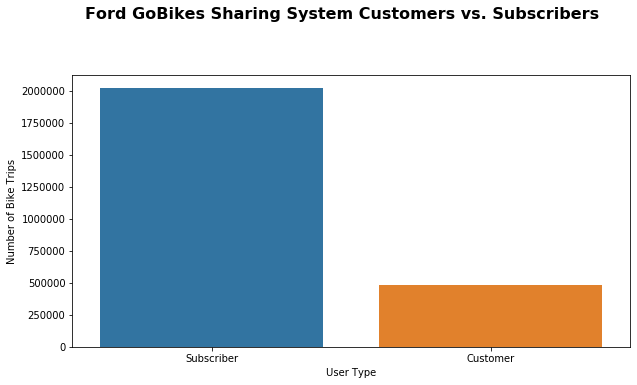

In [34]:
# Plot Number of Customers vs Subscribers in the Ford GoBike System to make a comparison.
plt.figure(figsize = [10, 5])
graph = sb.countplot(data = df_cleaned, x = "user_type", 
                     order = df_cleaned.user_type.value_counts().index);
graph.set_xlabel('User Type');
graph.set_ylabel('Number of Bike Trips');
plt.suptitle('Ford GoBikes Sharing System Customers vs. Subscribers', 
             y=1.07, fontsize=16, fontweight='bold');

### Ford GoBike Sharing System Customers vs. Subscribers

> There are more than 200,000 Subscribers as displayed in the Customers vs. Subscribers in Ford GoBike Sharing System chart.

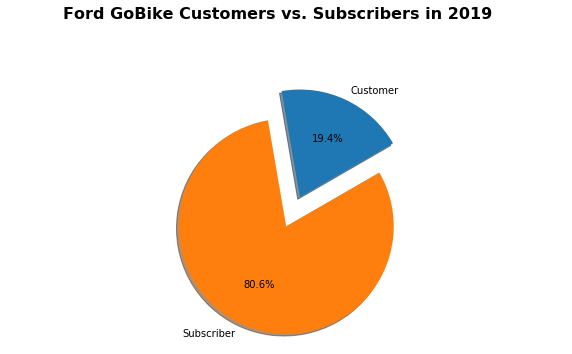

In [35]:
# Plot a pie chart to compare the percentage of Customers vs Subscribers that are using the platform
plt.figure(figsize = [10, 5])
labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
explode = (0, 0.3)
plt.pie(size, explode=explode, labels = labels, autopct='%1.1f%%', 
        shadow=True, startangle=30, textprops={'color':'black'})
plt.axis('equal')
plt.suptitle('Ford GoBike Customers vs. Subscribers in 2019', y=1.07,
             fontsize=16, fontweight='bold');

### Ford GoBikes System Customers vs. Subscribers in 2019

> In 2019, 80.6% of the user types in the Ford GoBikes sharing platform were Subscribers. 19.4% of the user types in the Ford GoBikes Sharing Platform were Customers. 



<Figure size 864x360 with 0 Axes>

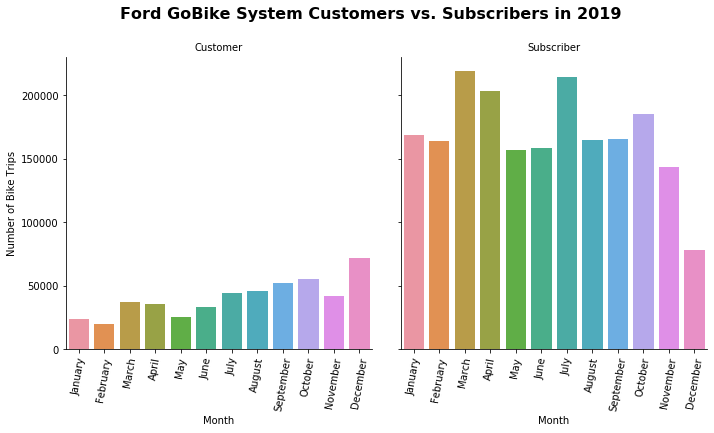

In [36]:
# Plot comparison of usage between Customers vs Subscribersin 2019
plt.figure(figsize = [12, 5])
graph = sb.catplot(data=df_cleaned, x='start_time_month', 
                   col="user_type", kind='count', sharey = True);
graph.set_axis_labels("Month", "Number of Bike Trips");
graph.set_titles("{col_name}");
graph.fig.suptitle('Ford GoBike System Customers vs. Subscribers in 2019',
                   y=1.07, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=80);

### Customers vs. Subscribers Usage in Ford GoBikes Sharing

> There are more than 200,000 Subscribers as displayed in the Customers vs. Subscribers in Ford GoBike Sharing System chart. 

Customers: The demand is high during December. However, the frequency is high betwen the months of July - October 2019.

Subscribers: The demand is highest in March 2019. THis is followed by July 2019 which is Summer time in the Bay Area and April which is Spring. 




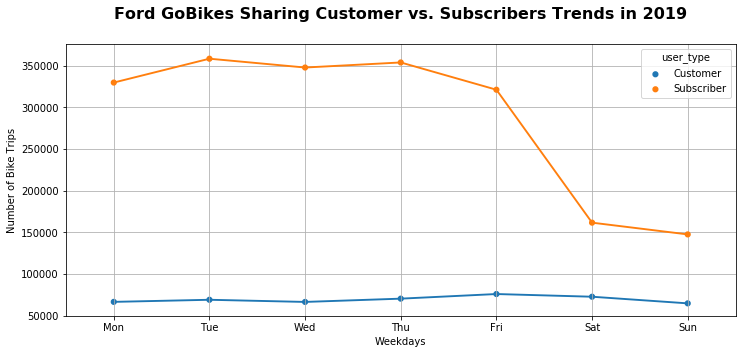

In [37]:
plt.figure(figsize=(12, 5))
df_cleaned_user_week = df_cleaned.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax = sb.pointplot(data=df_cleaned_user_week, x='start_time_weekday', 
                  y=0, hue = 'user_type', scale=.7, order = weekday);
plt.title('Ford GoBikes Sharing Customer vs. Subscribers Trends in 2019', y=1.07, 
          fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

### Ford GoBikes Sharing Customer vs. Subscribers Trends in 2019
 
In 2019, customers usage is quite low and consistant staying under 10,000 bike trips during the week. While Subscribers frequently used the the Ford GoBikes Sharing platform during Monday - Thursday with a drop of the number of bike trips on Friday and a significant drop through to Saturday and Sunday. 


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The importance of including the user type to the data analysis revealed that there were some differences in the behaviour of the customers and subscribers using the Ford GoBikes Sharing platform. 

> The dataset highlights the usage trends between customers and subscribers. This suggests that Customers are casual users and the Subscribers are daily commuters that maybe working, studying etc. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Through Observation, there is a difference in usage between customers and subscribers. The popularity of using Ford GoBikes for Customers is usually in December and increases more on Saturday as opposed to Subscribers where it decreases significantly on Saturday and during the weekend. 
> There were some limitations in this analysis, due to the anomity of customer data shighuch as gender. 

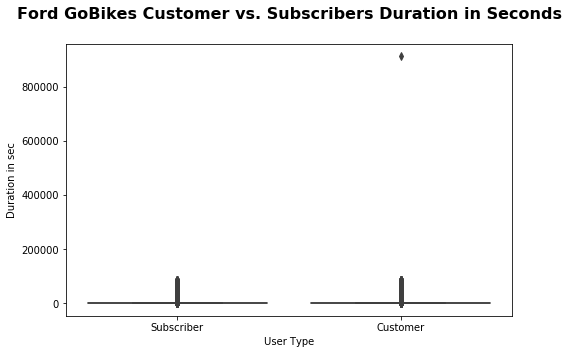

In [38]:
# Number of bike trips Customers vs. Subscriber Usage by Duration
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec')
plt.title('Ford GoBikes Customer vs. Subscribers Duration in Seconds', y=1.07, fontsize=16, fontweight='bold')
plt.xlabel('User Type')
plt.ylabel('Duration in sec')
plt.show()



### Customers vs. Subscribers Ride Duration in Seconds

> In 2019, the graph above highlights that the values are vey widespread to see a box plot. In the next observation, will have a look at the box plot with the duration in minutes as opposed to seconds. 


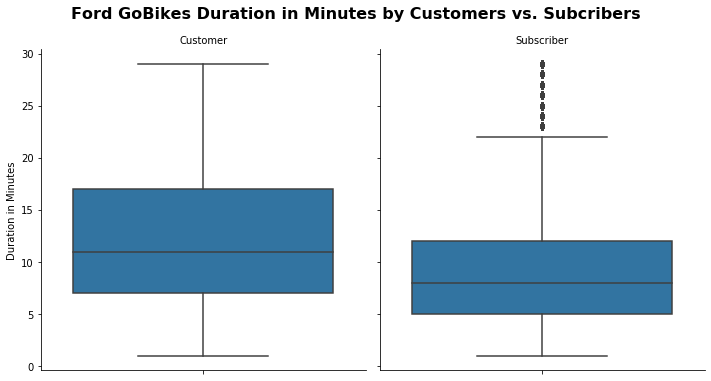

In [39]:
data = df_cleaned.query('duration_min < 30')
x = sb.catplot(data=data, y='duration_min', 
               col="user_type", kind='box')
x.set_titles(col_template = '{col_name}')
x.set_axis_labels("", "Duration in Minutes")
x.fig.suptitle('Ford GoBikes Duration in Minutes by Customers vs. Subcribers',
               y=1.05, fontsize=16, fontweight='bold');

###  Duration in Minutes by User Type 

> The Duration in Minutes by User Type plot highlights that Customers normally have longer trip durations. Customers normally ride between 8 minutes and 18 minutes. Subscriber trips are normally shorter and last anywhere between 5-13 minutes. 


## Step 5. Multivariate Exploration

> In this section, I plot more graphs in order to investigate the duration of the Ford Go Bike data.


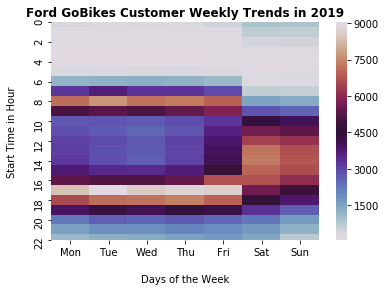

In [40]:
#Ford GoBikes Customer 
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_cleaned['start_time_weekday'] = pd.Categorical(df_cleaned['start_time_weekday'], 
                                                  categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);
df_customer = df_cleaned.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_customer = df_customer.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
heat_map = sb.heatmap(df_customer, cmap = 'twilight')
plt.title('Ford GoBikes Customer Weekly Trends in 2019', y=1.07, fontweight='bold')
plt.xlabel('Days of the Week', labelpad = 17)
plt.ylabel('Start Time in Hour',  labelpad = 17)
plt.show()


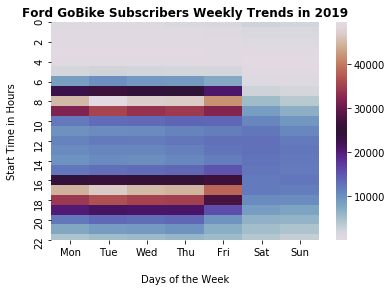

In [41]:
#Heat Map for Ford GoBikes Subscriber Information
df_subscriber = df_cleaned.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
hot_maps = sb.heatmap(df_subscriber, cmap = 'twilight')
plt.title("Ford GoBike Subscribers Weekly Trends in 2019", y=1.07, fontweight='bold')
plt.xlabel('Days of the Week', labelpad = 17)
plt.ylabel('Start Time in Hours', labelpad = 17);
plt.show()

## Ford GoBike HeatMap

> As per the heat map above, Customers who use the Ford Gobikes sharing system mainly on the weekends. While, Subscriber normally ride bikes during the weekday from Monday through to Friday, around 8-9am and 4-6pm. In the weekends, there is a significant drop in the number of rented bikes.

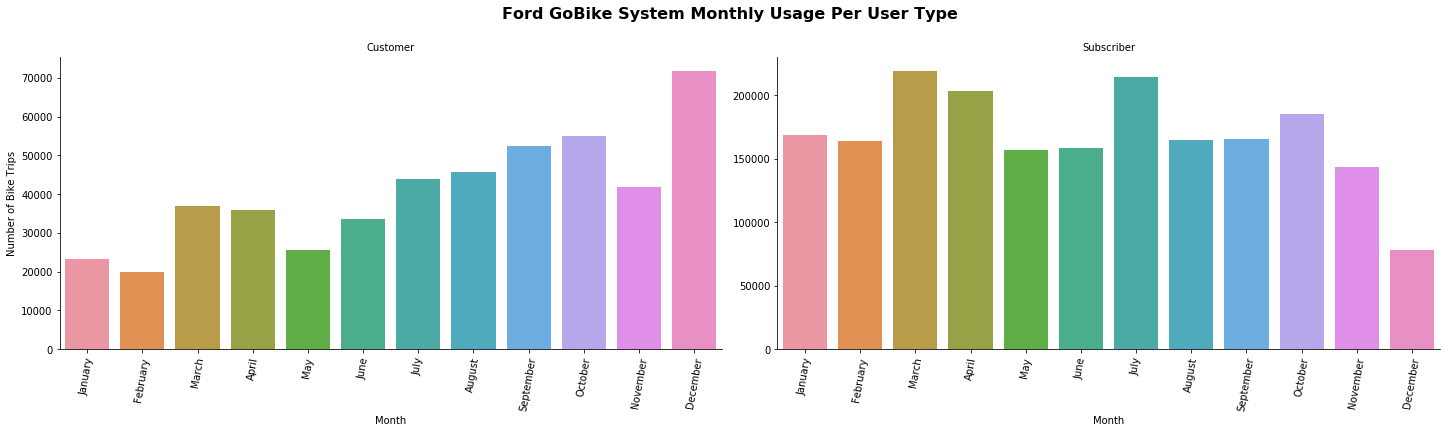

In [44]:
# Monthly usage by user type 
graph = sb.catplot(data=df_cleaned, x='start_time_month', col="user_type", kind='count', sharey = False, height=5, aspect=2);
graph.set_axis_labels("Month", "Number of Bike Trips")
graph.set_titles("{col_name}")
graph.fig.suptitle('Ford GoBike System Monthly Usage Per User Type', y=1.07, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=80);

## Ford GoBike Monthly Usage Per User Type

> As per the graph above, in 2019 the Ford GoBike Monthly Usage per User Type. There are two types of users who use the Ford GoBike which is between Customer and Subscriber. 

> Customers saw an increase of usage in December while Subscribers would frequently use the the Ford GoBike system in March, July and April. While the Monthly usage for Subscribers would decrease in December. 


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Through further observation between Customer and Supplier behaviours, Customers saw an increase of usage in December while Subscribers would frequently use the the Ford GoBike system in March, July and April. While the Monthly usage for Subscribers would decrease in December. 

### Were there any interesting or surprising interactions between features?

> Through observation of the heatmap, Customers who use the Ford Gobikes sharing system mainly on the weekends. While, Subscriber normally ride bikes during the weekday from Monday through to Friday, around 8-9am and 4-6pm. In the weekends, there is a significant drop in the number of bikes used in the weekends from the subscribers.


# References

1. How To Combine Multiple CSV Files In Python: https://sempioneer.com/python-for-seo/how-to-combine-multiple-csv-files-in-python/
2. FordGoBike Data Set: https://www.lyft.com/bikes/bay-wheels/system-data
3. Github: https://github.com/ijdev/Ford-GoBike-System-Data---Data-Analysis/blob/master/exploration_template.ipynb, 
4. Github: https://github.com/satyarajreddy/Udacity-Data-Visualization/blob/master/Visualize_Data.ipynb 
5. Github: https://gist.github.com/rochacbruno/2883505
6. Github: https://github.com/chelseymarie6/Communicate-Data-Findings
7. Github: https://github.com/rishusingh121/fordgobike/blob/master/slide_deck_template.ipynb
8. Keggle: https://www.kaggle.com/chirag02/ford-gobike-data-analysis
9. seaborn catplot: https://seaborn.pydata.org/generated/seaborn.catplot.html
10. matplotlib Documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

